In [1]:
%%capture
from IPython.display import display, Markdown
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(".src")
from src.data import utils
from src.data.fitbit import sleep, activity
from src.models import ols

%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Parameters
report = {
    "title": "The effect of magnesium supplementation on sleep quality: phase II",
    "author": "Peter Richens",
    "design": "A randomised trial was conducted on 1 adult male (me). The patient's sleep episodes where randomly allocated into the magnesium group (which recieved 200 mg of magnesium lysinate glycinate chelate) or the control group. Sleep activity was tracked by the patient's Fitbit device.",
    "source": "https://github.com/peterjrichens/personal-rct",
    "keywords": [
        "magnesium",
        "sleep",
        "magnesium supplementation",
        "insomnia",
        "activity trackers",
        "fitbit",
    ],
    "related_studies": "https://peterjrichens.github.io/personal-rct/magnesium_sleep_may_2021.html",
}
data = {
    "source": "fitbit",
    "path": "data/MyFitbitData/PeterRichens",
    "start_date": "2021-04-29",
    "end_date": "2021-07-17",
}
treatment = {
    "dates": {
        "magnesium": [
            "2021-05-29",
            "2021-05-31",
            "2021-06-01",
            "2021-06-03",
            "2021-06-05",
            "2021-06-07",
            "2021-06-09",
            "2021-06-11",
            "2021-06-13",
            "2021-06-17",
            "2021-06-19",
            "2021-06-21",
            "2021-06-23",
            "2021-06-25",
            "2021-06-27",
            "2021-07-01",
            "2021-07-05",
            "2021-07-07",
            "2021-07-11",
            "2021-07-13",
            "2021-07-15",
        ],
        "control": [
            "2021-05-30",
            "2021-06-02",
            "2021-06-04",
            "2021-06-06",
            "2021-06-08",
            "2021-06-10",
            "2021-06-12",
            "2021-06-14",
            "2021-06-16",
            "2021-06-18",
            "2021-06-20",
            "2021-06-22",
            "2021-06-24",
            "2021-06-26",
            "2021-06-28",
            "2021-06-30",
            "2021-07-02",
            "2021-07-04",
            "2021-07-06",
            "2021-07-08",
            "2021-07-10",
            "2021-07-12",
            "2021-07-14",
            "2021-07-16",
        ],
    },
    "exclude_dates": ["2021-06-15", "2021-06-29", "2021-07-03", "2021-07-09"],
    "target": "magnesium",
    "reference": "control",
}
model = {
    "dependent_variables": [
        "composite_sleep_score",
        "total_sleep_duration",
        "rem_sleep_duration",
        "deep_sleep_duration",
    ],
    "control_variables": ["day_of_week", "sleep_start_time", "steps", "calories"],
}

<IPython.core.display.Javascript object>

In [3]:
treatment_df = utils.get_treatment_df(
    data["start_date"], data["end_date"], treatment
).pipe(utils.add_day_of_week)

assert data["source"] == "fitbit"

sleep_df = (
    utils.load_data(data["path"], "Sleep/sleep-*.json")
    .pipe(sleep.filter_main_sleep)
    .pipe(sleep.add_treatment_date)
    .pipe(sleep.add_sleep_start_time)
    .pipe(sleep.add_total_sleep_duration)
    .pipe(sleep.add_stage_duration)
    .pipe(sleep.select_columns)
    .pipe(utils.validate)
)

sleep_score_df = (
    utils.load_data(data["path"], "Sleep/sleep_score.csv")
    .pipe(sleep.filter_sleep_score)
    .pipe(utils.validate)
)

steps_df = (
    utils.load_data(data["path"], "Physical Activity/steps-*.json")
    .pipe(activity.sum_by_treatment_date, "steps")
    .pipe(utils.validate)
)

calories_df = (
    utils.load_data(data["path"], "Physical Activity/calories-*.json")
    .pipe(activity.sum_by_treatment_date, "calories")
    .pipe(utils.validate)
)

<IPython.core.display.Javascript object>

In [4]:
df = (
    treatment_df.merge(sleep_df, on="treatment_date", how="left")
    .merge(sleep_score_df, on="treatment_date", how="left")
    .merge(steps_df, on="treatment_date", how="left")
    .merge(calories_df, on="treatment_date", how="left")
    .pipe(utils.validate)
)

<IPython.core.display.Javascript object>

In [5]:
results = []
for dependent_variable in model["dependent_variables"]:
    formula = ols.build_formula(
        df, dependent_variable, treatment, model["control_variables"]
    )
    results.append(
        ols.result_to_english(
            ols.fit_model(df[df[dependent_variable].notnull()], formula),
            dependent_variable,
            treatment,
        ),
    )

<IPython.core.display.Javascript object>

In [6]:
display(Markdown(f" # {report['title']}"))
display(Markdown(f" \n"))

display(Markdown(f" Author: {report['author']}"))
display(Markdown(f" Date: {time.strftime('%d %b %Y')}"))

display(Markdown(f" Keywords: {', '.join(report['keywords'])}"))

display(Markdown(f" ## Design"))
display(Markdown(f" \n"))
display(Markdown(f" {report['design']}"))
display(Markdown(f" See [related studies]({report['related_studies']})."))
display(Markdown(f" Source code available at: {report['source']}."))

display(Markdown(f" ## Results"))
display(Markdown(f" \n"))
for result in results:
    display(Markdown(f"* {result}"))

 # The effect of magnesium supplementation on sleep quality: phase II

 Author: Peter Richens

 Date: 17 Jul 2021

 Keywords: magnesium, sleep, magnesium supplementation, insomnia, activity trackers, fitbit

 ## Design

 A randomised trial was conducted on 1 adult male (me). The patient's sleep episodes where randomly allocated into the magnesium group (which recieved 200 mg of magnesium lysinate glycinate chelate) or the control group. Sleep activity was tracked by the patient's Fitbit device.

 See [related studies](https://peterjrichens.github.io/personal-rct/magnesium_sleep_may_2021.html).

 Source code available at: https://github.com/peterjrichens/personal-rct.

 ## Results

* The effect on composite sleep score was not statistically signficant.

* Magnesium had a 0.32 standard deviation decrease on total sleep duration relative to the control treatment (p value=0.011).

* The effect on rem sleep duration was not statistically signficant.

* The effect on deep sleep duration was not statistically signficant.

<IPython.core.display.Javascript object>

## Sample size

In [7]:
sample_size = (
    df[df.experiment_active]
    .treatment.value_counts()
    .rename("number_of_days")
    .to_frame()
)
sample_size.loc["total"] = sample_size.sum()
sample_size

,number_of_days
control,24
magnesium,21
total,45


<IPython.core.display.Javascript object>

## Summary statistics during pre-experiment baseline

In [8]:
df[df.experiment_active == False].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sleep_duration,29.0,463.517241,35.668734,403.00,448.00,462.00,484.00,555.00
deep_sleep_duration,29.0,72.758621,21.423710,22.00,62.00,74.00,87.00,118.00
rem_sleep_duration,29.0,110.206897,26.065000,66.00,93.00,108.00,134.00,152.00
sleep_start_time,29.0,-33.051724,52.190986,-120.50,-74.50,-44.00,-4.00,99.50
composite_sleep_score,30.0,81.766667,5.069743,70.00,78.50,82.00,85.75,90.00
steps,30.0,5220.366667,2930.243999,308.00,2698.75,5131.00,7241.25,12205.00
calories,30.0,2317.269333,314.401309,1671.44,2133.45,2289.31,2474.36,3283.53


<IPython.core.display.Javascript object>

## Summary statistics during experiment period

In [9]:
df[df.experiment_active].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sleep_duration,42.0,448.166667,59.371882,205.00,416.25,458.00,490.75,537.00
deep_sleep_duration,42.0,78.333333,17.419735,28.00,67.00,80.00,88.25,130.00
rem_sleep_duration,42.0,108.595238,29.209971,11.00,93.50,109.00,128.00,172.00
sleep_start_time,42.0,-10.500000,62.819428,-92.50,-47.00,-16.25,6.75,289.00
composite_sleep_score,42.0,82.619048,6.148378,65.00,79.50,84.00,86.00,92.00
steps,45.0,5794.777778,3127.193230,2083.00,3277.00,4966.00,8369.00,13028.00
calories,45.0,2395.160667,270.646372,1969.15,2194.60,2351.20,2524.84,3078.27


<IPython.core.display.Javascript object>

## Outcome variables over time

Red line shows start of experiment period.

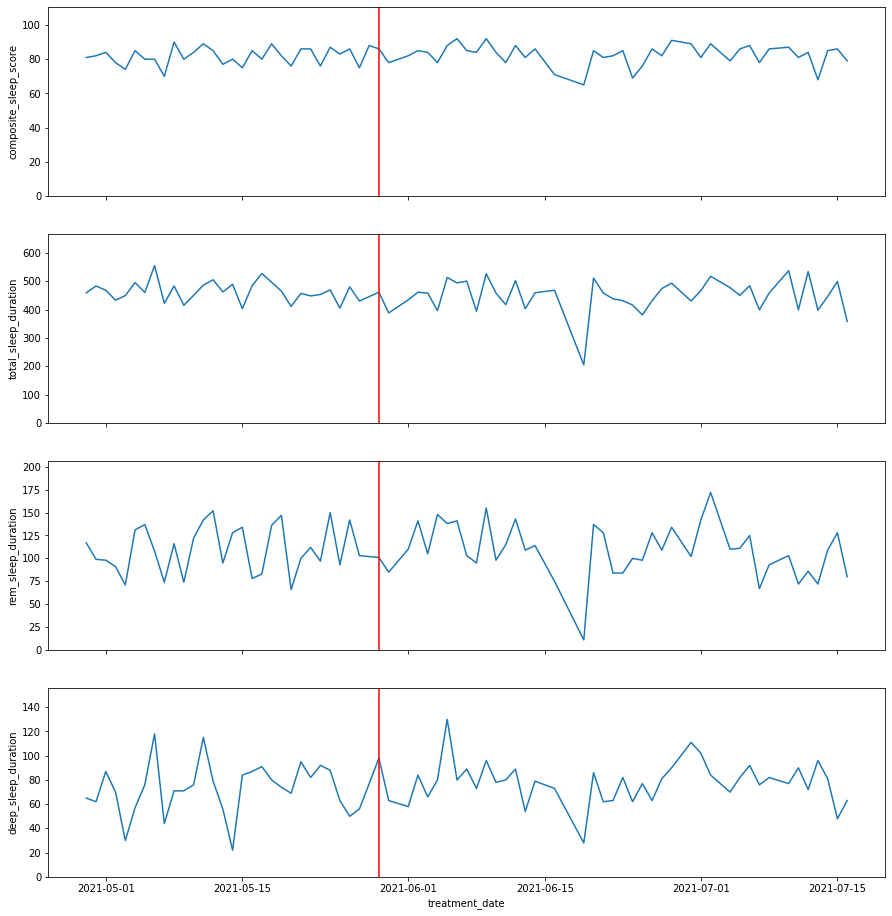

<IPython.core.display.Javascript object>

In [10]:
num_plots = len(model["dependent_variables"])
dims = (15, 4 * num_plots)
_, axes = plt.subplots(num_plots, figsize=dims, sharex=True)
for ax, v in zip(axes, model["dependent_variables"]):
    g = sns.lineplot("treatment_date", v, data=df, ax=ax)
    g = g.set(ylim=(0, df[v].max()*1.2))
    ax.axvline(df[df.experiment_active].treatment_date.min(), c='r')


## Regression results

In [12]:
for dependent_variable in model["dependent_variables"]:
    display(Markdown(f"### Results for {dependent_variable.replace('_', ' ')}"))
    formula = ols.build_formula(
        df, dependent_variable, treatment, model["control_variables"]
    )
    result = ols.fit_model(df[df[dependent_variable].notnull()], formula)
    display(Markdown(ols.result_to_english(result, dependent_variable, treatment)))
    display(result.summary())

### Results for composite sleep score

The effect on composite sleep score was not statistically signficant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     standardize(composite_sleep_score)   R-squared:                       0.384
Model:                                            OLS   Adj. R-squared:                  0.185
Method:                                 Least Squares   F-statistic:                     9.277
Date:                                Sat, 17 Jul 2021   Prob (F-statistic):           7.13e-07
Time:                                        15:37:56   Log-Likelihood:                -49.423
No. Observations:                                  42   AIC:                             120.8
Df Residuals:                                      31   BIC:                             140.0
Df Model:                                          10                                         
Covariance Type:                                  HAC                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.0065      0.273      0.024      0.981      -0.528       0.541
C(treatment, Treatment(reference='control'))[T.magnesium]    -0.3713      0.236     -1.575      0.115      -0.833       0.091
C(day_of_week)[T.Monday]                                      0.1473      0.387      0.380      0.704      -0.612       0.907
C(day_of_week)[T.Saturday]                                    1.1475      0.267      4.294      0.000       0.624       1.671
C(day_of_week)[T.Sunday]                                      0.2899      0.394      0.735      0.462      -0.483       1.063
C(day_of_week)[T.Thursday]                                   -0.4599      0.484     -0.949      0.342      -1.409       0.490
C(day_of_week)[T.Tuesday]                                    -0.4473      0.561     -0.797      0.425      -1.547       0.652
C(day_of_week)[T.Wednesday]                                   0.2826      0.444      0.636      0.525      -0.588       1.153
standardize(sleep_start_time)                                -0.6537      0.117     -5.601      0.000      -0.882      -0.425
standardize(steps)                                           -0.2749      0.292     -0.940      0.347      -0.848       0.298
standardize(calories)                                         0.1000      0.324      0.308      0.758      -0.535       0.735
==============================================================================
Omnibus:                        8.057   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.895
Skew:                          -0.867   Prob(JB):                       0.0318
Kurtosis:                       3.965   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for total sleep duration

Magnesium had a 0.32 standard deviation decrease on total sleep duration relative to the control treatment (p value=0.011).

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     standardize(total_sleep_duration)   R-squared:                       0.774
Model:                                           OLS   Adj. R-squared:                  0.701
Method:                                Least Squares   F-statistic:                     38.73
Date:                               Sat, 17 Jul 2021   Prob (F-statistic):           9.89e-15
Time:                                       15:37:56   Log-Likelihood:                -28.354
No. Observations:                                 42   AIC:                             78.71
Df Residuals:                                     31   BIC:                             97.82
Df Model:                                         10                                         
Covariance Type:                                 HAC                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -0.0183      0.316     -0.058      0.954      -0.638       0.602
C(treatment, Treatment(reference='control'))[T.magnesium]    -0.3151      0.124     -2.545      0.011      -0.558      -0.072
C(day_of_week)[T.Monday]                                      0.1638      0.356      0.460      0.645      -0.534       0.861
C(day_of_week)[T.Saturday]                                    1.1831      0.295      4.017      0.000       0.606       1.760
C(day_of_week)[T.Sunday]                                      0.2131      0.326      0.653      0.514      -0.427       0.853
C(day_of_week)[T.Thursday]                                   -0.2582      0.391     -0.661      0.509      -1.024       0.508
C(day_of_week)[T.Tuesday]                                    -0.4781      0.368     -1.300      0.194      -1.199       0.243
C(day_of_week)[T.Wednesday]                                   0.1598      0.321      0.497      0.619      -0.470       0.789
standardize(sleep_start_time)                                -0.9517      0.073    -13.086      0.000      -1.094      -0.809
standardize(steps)                                           -0.3344      0.180     -1.854      0.064      -0.688       0.019
standardize(calories)                                         0.2325      0.177      1.310      0.190      -0.115       0.580
==============================================================================
Omnibus:                        3.905   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.796
Skew:                           0.599   Prob(JB):                        0.247
Kurtosis:                       3.405   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for rem sleep duration

The effect on rem sleep duration was not statistically signficant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     standardize(rem_sleep_duration)   R-squared:                       0.527
Model:                                         OLS   Adj. R-squared:                  0.374
Method:                              Least Squares   F-statistic:                     9.587
Date:                             Sat, 17 Jul 2021   Prob (F-statistic):           5.00e-07
Time:                                     15:37:56   Log-Likelihood:                -43.895
No. Observations:                               42   AIC:                             109.8
Df Residuals:                                   31   BIC:                             128.9
Df Model:                                       10                                         
Covariance Type:                               HAC                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.8529      0.372      2.294      0.022       0.124       1.582
C(treatment, Treatment(reference='control'))[T.magnesium]    -0.2428      0.212     -1.144      0.253      -0.659       0.173
C(day_of_week)[T.Monday]                                     -1.0019      0.507     -1.978      0.048      -1.995      -0.009
C(day_of_week)[T.Saturday]                                    0.0652      0.458      0.142      0.887      -0.833       0.963
C(day_of_week)[T.Sunday]                                     -0.6404      0.501     -1.279      0.201      -1.622       0.341
C(day_of_week)[T.Thursday]                                   -1.0826      0.407     -2.662      0.008      -1.880      -0.286
C(day_of_week)[T.Tuesday]                                    -1.3899      0.441     -3.150      0.002      -2.255      -0.525
C(day_of_week)[T.Wednesday]                                  -1.0941      0.461     -2.374      0.018      -1.997      -0.191
standardize(sleep_start_time)                                -0.8058      0.104     -7.721      0.000      -1.010      -0.601
standardize(steps)                                            0.2030      0.330      0.616      0.538      -0.443       0.849
standardize(calories)                                        -0.2598      0.282     -0.922      0.357      -0.812       0.293
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.381
Skew:                           0.032   Prob(JB):                        0.501
Kurtosis:                       2.114   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for deep sleep duration

The effect on deep sleep duration was not statistically signficant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     standardize(deep_sleep_duration)   R-squared:                       0.427
Model:                                          OLS   Adj. R-squared:                  0.243
Method:                               Least Squares   F-statistic:                     5.566
Date:                              Sat, 17 Jul 2021   Prob (F-statistic):           0.000102
Time:                                      15:37:56   Log-Likelihood:                -47.888
No. Observations:                                42   AIC:                             117.8
Df Residuals:                                    31   BIC:                             136.9
Df Model:                                        10                                         
Covariance Type:                                HAC                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.1395      0.150      0.927      0.354      -0.155       0.434
C(treatment, Treatment(reference='control'))[T.magnesium]     0.2052      0.244      0.841      0.401      -0.273       0.684
C(day_of_week)[T.Monday]                                     -0.3509      0.311     -1.128      0.259      -0.961       0.259
C(day_of_week)[T.Saturday]                                    0.4595      0.396      1.161      0.245      -0.316       1.235
C(day_of_week)[T.Sunday]                                     -0.6768      0.273     -2.477      0.013      -1.212      -0.141
C(day_of_week)[T.Thursday]                                   -0.8250      0.416     -1.983      0.047      -1.641      -0.010
C(day_of_week)[T.Tuesday]                                    -0.3442      0.493     -0.698      0.485      -1.310       0.622
C(day_of_week)[T.Wednesday]                                   0.1425      0.271      0.527      0.598      -0.388       0.673
standardize(sleep_start_time)                                -0.6352      0.130     -4.889      0.000      -0.890      -0.381
standardize(steps)                                           -0.0316      0.225     -0.140      0.889      -0.473       0.410
standardize(calories)                                         0.2189      0.229      0.957      0.339      -0.230       0.668
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.840
Skew:                           0.335   Prob(JB):                        0.657
Kurtosis:                       2.824   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

<IPython.core.display.Javascript object>